## `minimize_scalar()` and `minimize()` 
to minimize a function of one variable and many variables, respectively.

In [1]:
from scipy.optimize import minimize_scalar 
from scipy.optimize import minimize,Bounds


## minimize_scalar

`minimize_scalar` is used for scalar fucntion *(the function that accepts one number and gives one output)* .

SciPy library has two built in methods :
* **brent** - (this is  default method and generally gives better result)
 * without bound -  default
 * with bound - bounded
* **golden**

For **brent** and **golden** methods, an additional argument `bracket= (a,b)` can be provided for the initial guess in the range $(a,b)$. However, the solution can be found outside this range.

To find solution in a particular range of the input variable then, we use `bounds =(a,b)` and method is specified using `method = bounded`.  *Remark - if bound is given without specifying the method, then it will take the default (unbounded) method*

### Remark !!
Minimization algorithm may give local minima (that may not be the global minima in the entier domain).

Here, the function gave the local minima at $7.543$ in the bound $(1,10)$, where the minimum at $1.471$ is also present

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
def objective_function(x):
    return -(np.exp(-x/10) * math.sin(x))


# Minimization with default  method
res = minimize_scalar(objective_function)
print(res)

     fun: -0.8589127507683367
    nfev: 13
     nit: 9
 success: True
       x: 1.4711276771388557


In [3]:
# Minimization with bound method
res = minimize_scalar(objective_function,bracket=(1,5,6,7), method='bounded', bounds=(1,10))
print(res)

     fun: -0.45821972382120835
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 7.754312965072093


In [4]:
# Minimization without bound method
res = minimize_scalar(objective_function,bracket=(1,2), bounds=(5,10))
print(res)

     fun: -0.8589127507683367
    nfev: 13
     nit: 9
 success: True
       x: 1.4711276748778765


The result of the `minimize_scalar` function gives ouput for various parameters like function value, number of function evaluation,number of iteration, status and value  of variable etc.

To print only specific parameter we can use `res.parameter`
for optimization function , `res.fun`
for value of vairable, `res.x` etc.

In [5]:
# Print the value of optimization function
res.fun

-0.8589127507683367

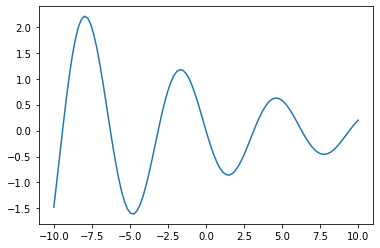

In [6]:
a = -10
b = 10
c = 100
plt.plot(np.linspace(a,b,c),[objective_function(x) for x in np.linspace(a,b,c)])

## minimize

this is the generallized method, that can handle multivariate function *(function having more than one variables)*

**Syntax :** `scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`

here, `fun` is the function that is to be minimized subjected to :

`x0` is the initial guess of input variable.

`args()` arguments can be defined for the function `fun` in case `fun` is defined with arbitrary `args()` **(optional)**

`tol = ` is used to define the tolerance of the final solution. When tol is specified, the selected minimization algorithm sets some relevant solver-specific tolerance(s) equal to tol.  **(optional)**

`method =` is used to define a particular method of minimizaition, it can be used to enhance the speed of computation based on the nature of the function. **(optional)**  

`jac = ` and `hess = ` are the *Jacobian* and *Hessian* are the first and second differential of the function which can be defined to enhance the speed of computation. **(optional)**  

`bounds = ` are defined for design variables to limit the solution in particular range of design variable. (optional)

`constraints= ` are used to define the various constraints, that objective function is subjected to. **(optional)** 

`option = ` is used to define parameters for solvers including maximum itterations. **(optional)** 

Reference - [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#rdd2e1855725e-5), 
 [real-python](https://realpython.com/python-scipy-cluster-optimize/) & 
[youtube](https://www.youtube.com/watch?v=cXHvC_FGx24)


### Un-constrained function

A simple function in single variable is to be minimized, subjected to no constraints.  
$$f(x) = x^2 + 2$$

Using `minimize`

In [7]:
def f_x(x):
    return (x**2 + 2)


minimize(f_x,1)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([5.31130494e-09])

### Constrained function

Minimize the function
$$ x_1  x_4 (x_1 + x_2 + x_3) + x_3 $$

Subjected to :  
$x_1 x_2 x_3 x_4 \geq 25$  
$ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  
$ 1 \leq x_1, x_2, x_3, x_4 \leq 5 $  

Initial guess $= (1,5,5,1)$

*Remark - while defining the ineuqality constraints, the constraint function should be defined in the form* $f(x) \geq 0$ 

In [8]:
# Define optimize function
def f_x(x):
    return x[0] * x[3] * (x[0] + x[1] + x[2]) + x[2] 

#Define the constraint function
def con_1(x):
    return x[0] * x[1] * x[2] * x[3] -25.0

def con_2(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 - 40.0

# Define the constraint type
con1 ={'type': 'ineq', 'fun': con_1}
con2 ={'type': 'eq', 'fun': con_2}

# Define the bounds
b = (1,5)
bnds = (b,b,b,b) 


# Minimizing the objective function
res = minimize(f_x,(1,5,5,1), bounds = bnds,  constraints=[con1,con2])
res

     fun: 17.01401724556073
     jac: array([14.57227039,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299607, 3.82115466, 1.37940764])

In [9]:
res.fun

17.01401724556073